### `Import the main Libraries`

In [4]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Other
import os, joblib

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn_features.transformers import DataFrameSelector

## sklearn -- metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
## sklearn -- Models
from sklearn.ensemble import RandomForestClassifier

## Xgboost
from xgboost import XGBClassifier
#light gpm
from lightgbm import LGBMClassifier


### Data Collection and Processing

In [6]:
## Read the CSV file using pandas
FILE_PATH = os.path.join(os.getcwd(), 'anemia.csv')
anemia = pd.read_csv(FILE_PATH)


## Show the Head of the DF
anemia.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [7]:
## Check some info about the Dataset to (see nulls and DataTypes)
anemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [8]:
## Show some statistics about the Dataset
anemia.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [40]:
anemia.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

### `Exploratory Data Analysis`

#### data is balanced or imbalanced

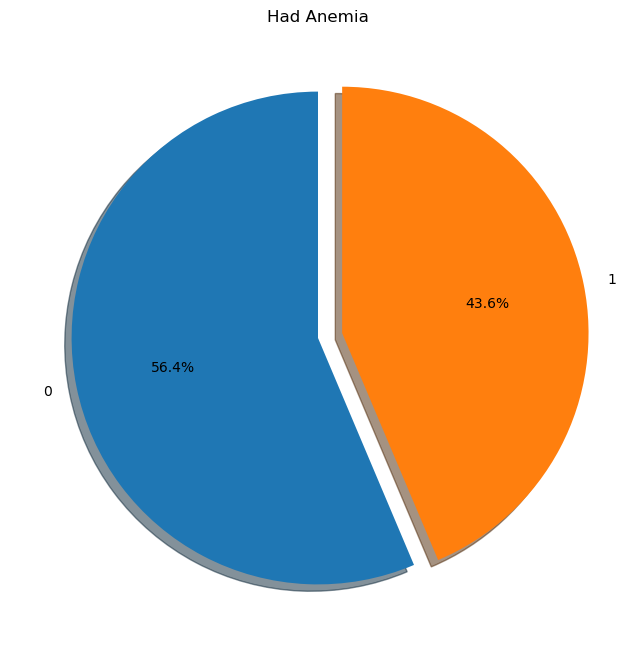

In [63]:
plt.figure(figsize=(8, 8)) 
anemia['Result'].value_counts().plot.pie(
    explode=[0, 0.1], 
    autopct='%1.1f%%', 
    shadow=True,
    startangle=90
)
plt.title('Had Anemia')
plt.ylabel('')  
plt.show()

#### Categorical Feature: Gender

In [52]:
anemia.groupby(['Gender','Result'])['Result'].count()

Gender  Result
0       0         473
        1         208
1       0         328
        1         412
Name: Result, dtype: int64

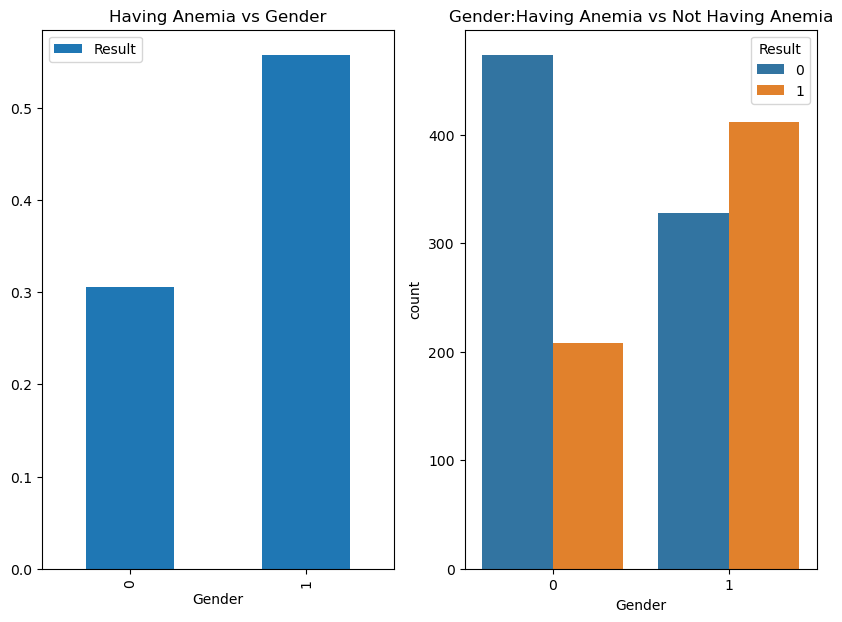

In [64]:
f,ax=plt.subplots(1,2,figsize=(10,7))
anemia[['Gender','Result']].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Having Anemia vs Gender')
sns.countplot(x='Gender',hue='Result',data=anemia,ax=ax[1])
ax[1].set_title('Gender:Having Anemia vs Not Having Anemia')
plt.show()

#### Hemoglobin

In [68]:
# See the min, max, mean values
print('The highest hemoglobin was of:',anemia['Hemoglobin'].max())
print('The lowest hemoglobin was of:',anemia['Hemoglobin'].min())
print('The average hemoglobin in the data:',anemia['Hemoglobin'].mean())

The highest hemoglobin was of: 16.9
The lowest hemoglobin was of: 6.6
The average hemoglobin in the data: 13.412737508796623


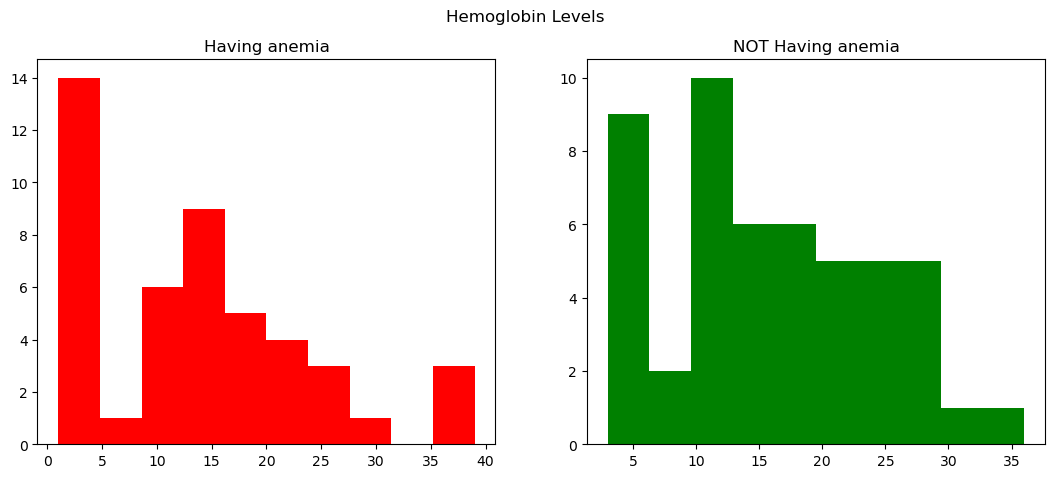

In [67]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=anemia[anemia['Result']==1]['Hemoglobin'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=anemia[anemia['Result']==0]['Hemoglobin'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('Hemoglobin Levels')
plt.show()

####  MCH (Mean Corpuscular Hemoglobin)

In [69]:
# See the min, max, mean values
print('The highest MCH was of:',anemia['MCH'].max())
print('The lowest MCH was of:',anemia['MCH'].min())
print('The average MCH in the data:',anemia['MCH'].mean())

The highest MCH was of: 30.0
The lowest MCH was of: 16.0
The average MCH in the data: 22.90562983814215


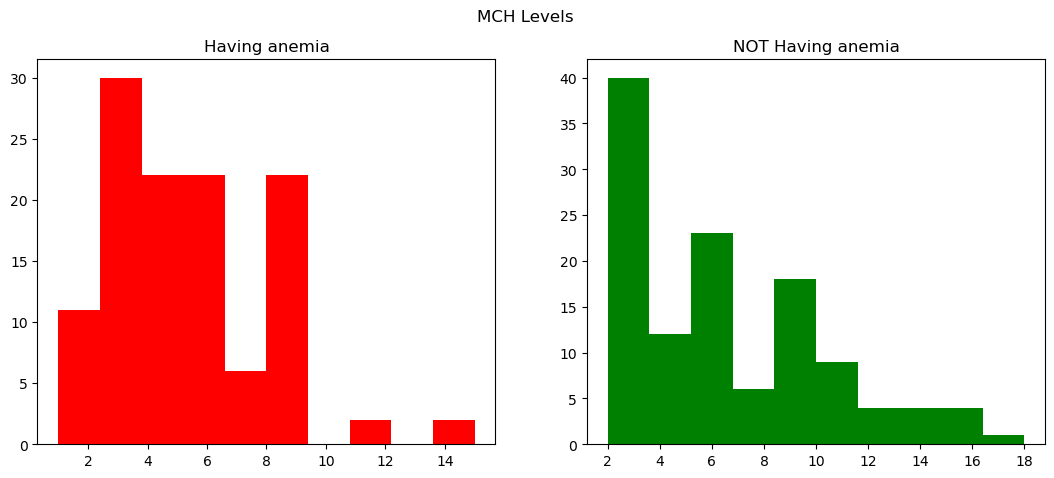

In [72]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=anemia[anemia['Result']==1]['MCH'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=anemia[anemia['Result']==0]['MCH'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCH Levels')
plt.show()

#### MCHC (Mean Corpuscular Hemoglobin Concentration)

In [73]:
# See the min, max, mean values
print('The highest MCHC was of:',anemia['MCHC'].max())
print('The lowest MCHC was of:',anemia['MCHC'].min())
print('The average MCHC in the data:',anemia['MCHC'].mean())

The highest MCHC was of: 32.5
The lowest MCHC was of: 27.8
The average MCHC in the data: 30.251231527093594


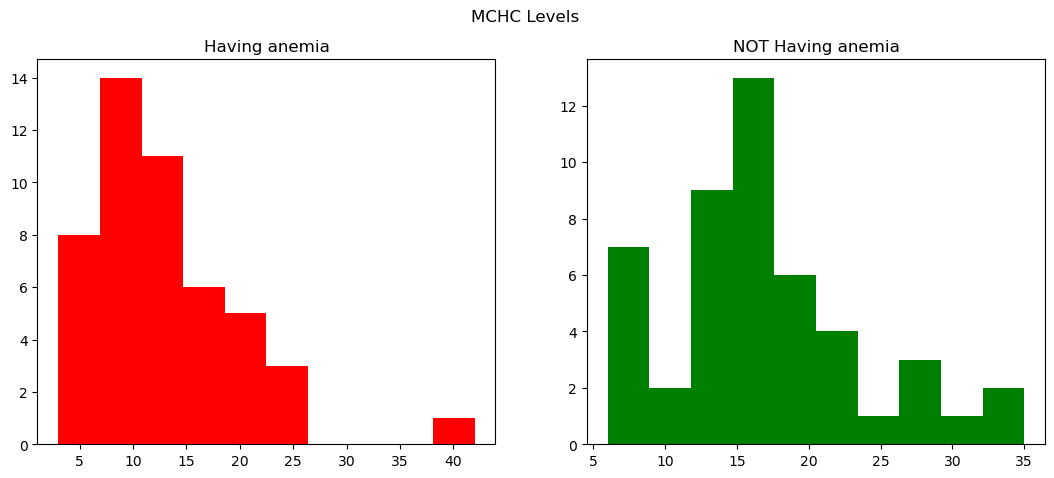

In [74]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=anemia[anemia['Result']==1]['MCHC'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=anemia[anemia['Result']==0]['MCHC'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCHC Levels')
plt.show()

#### MCV (Mean Corpuscular Volume)

In [75]:
# See the min, max, mean values
print('The highest MCV was of:',anemia['MCV'].max())
print('The lowest MCV was of:',anemia['MCV'].min())
print('The average MCV in the data:',anemia['MCV'].mean())

The highest MCV was of: 101.6
The lowest MCV was of: 69.4
The average MCV in the data: 85.5237860661506


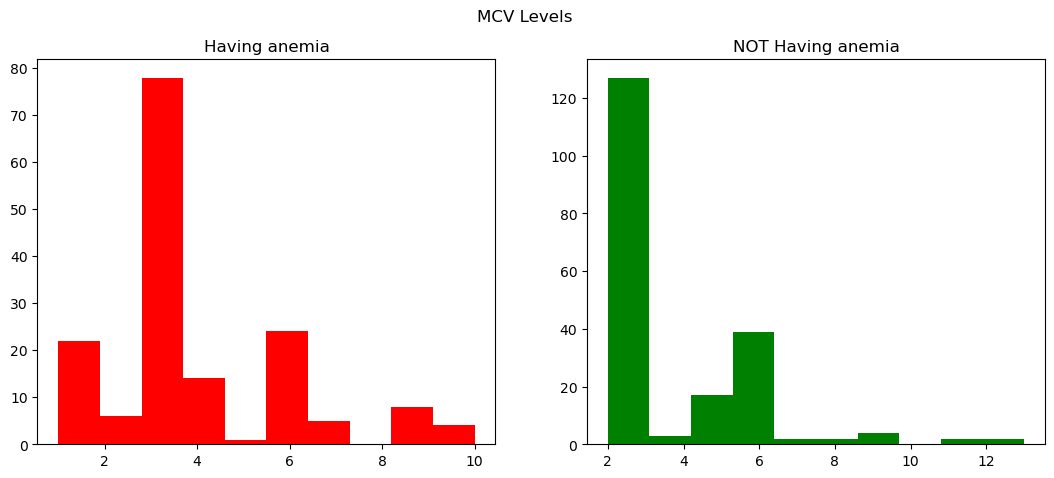

In [76]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=anemia[anemia['Result']==1]['MCV'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=anemia[anemia['Result']==0]['MCV'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCV Levels')
plt.show()

#### correlation

In [77]:
anemia.corr()['Result'].sort_values(ascending=False)


Result        1.000000
Gender        0.253169
MCHC          0.048067
MCV          -0.020571
MCH          -0.028678
Hemoglobin   -0.796261
Name: Result, dtype: float64

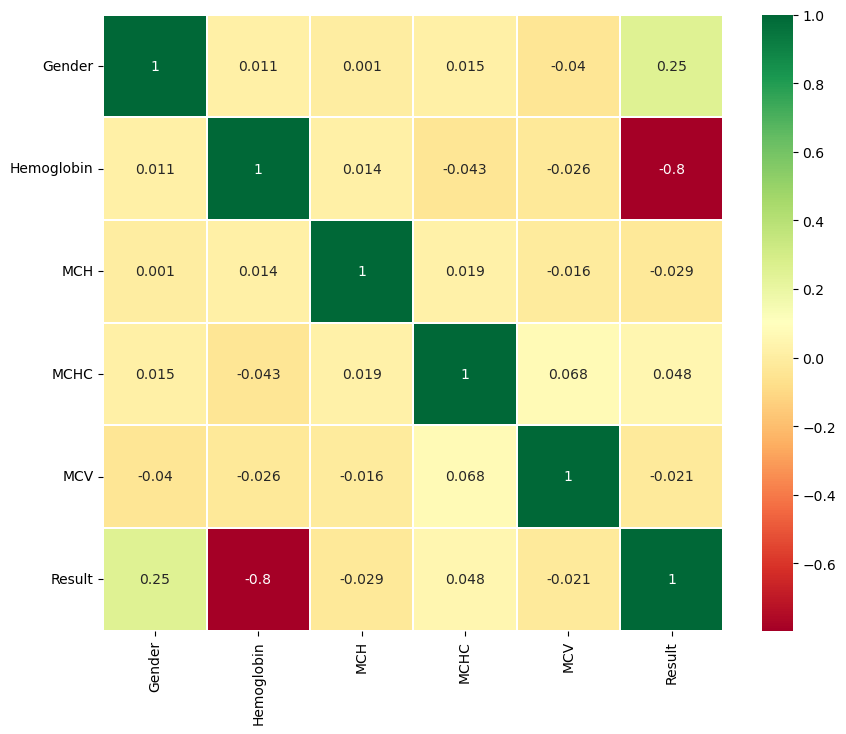

In [78]:
sns.heatmap(anemia.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### `Split the Dataset`


In [11]:
## Split the whole Dataset to Feature & Target
X = anemia.drop(columns=['Result'], axis=1)   ## Features
y = anemia['Result']   ## target


In [12]:
## Random split the dataset to two sets (train_set, test_set)
## For validation ---  I will use Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42) 
## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (1136, 5)
y_train shape --  (1136,)
X_test shape --  (285, 5)
y_test shape --  (285,)


In [13]:
X_train.median(axis=0)

Gender         1.00
Hemoglobin    13.20
MCH           22.70
MCHC          30.35
MCV           85.10
dtype: float64

### `Pipeline for Numerical Feature


In [14]:
## Building a pipeline for numerical variables
num_pipeline = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', RobustScaler())
                              ]
                       )
X_train_num = num_pipeline.fit_transform(X_train)  ## train
X_test_num = num_pipeline.transform(X_test)  ## test

### `Building ML Models`


### ` RandomForest`

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1) 
forest_clf.fit(X_train , y_train)  ## train



RandomForestClassifier(max_depth=6, max_samples=0.8, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [16]:

# Cross-validated accuracy scores
accuracy_scores = cross_val_score(forest_clf, X=X_train, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(forest_clf, X=X_train, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(forest_clf, X=X_train, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0000
CV F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0000
Final Accuracy: 1.0000
Confusion Matrix:
[[644   0]
 [  0 492]]


### `RF Tuning`

In [17]:
#RandomizedSearchCV search "randomly" for hyperparameters used cross validation 

params_best_forest = {'n_estimators': np.arange(200, 700, 50), 
                      'max_depth': np.arange(4, 20, 2),        
                      'max_samples':np.arange(.1, 1, .1) } 
## Intialize
search_random_forest = RandomizedSearchCV(estimator=forest_clf, param_distributions=params_best_forest, 
                                          n_iter=20, scoring='accuracy', 
                                          cv=5, verbose=6, random_state=42)
search_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=10, max_samples=0.8, n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5] END max_depth=10, max_samples=0.8, n_estimators=200;, score=1.000 total time=   0.2s
[CV 3/5] END max_depth=10, max_samples=0.8, n_estimators=200;, score=1.000 total time=   0.2s
[CV 4/5] END max_depth=10, max_samples=0.8, n_estimators=200;, score=0.991 total time=   0.2s
[CV 5/5] END max_depth=10, max_samples=0.8, n_estimators=200;, score=1.000 total time=   0.2s
[CV 1/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=1.000 total time=   0.2s
[CV 3/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=1.000 total time=   0.2s
[CV 4/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=0.991 total time=   0.2s
[CV 5/5] END max_depth=10, m

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=6,
                                                    max_samples=0.8,
                                                    n_estimators=150, n_jobs=-1,
                                                    random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'n_estimators': array([200, 250, 300, 350, 400, 450, 500, 550, 600, 650])},
                   random_state=42, scoring='accuracy', verbose=6)

In [18]:
## Get the best Params
best_foresr_params = search_random_forest.best_params_
print('best_foresr_params -- ', best_foresr_params)
## Get the best estimator
best_forest = search_random_forest.best_estimator_  ## predict using this Model
print('best_forest -- ', best_forest)

best_foresr_params --  {'n_estimators': np.int64(200), 'max_samples': np.float64(0.8), 'max_depth': np.int64(10)}
best_forest --  RandomForestClassifier(max_depth=np.int64(10), max_samples=np.float64(0.8),
                       n_estimators=np.int64(200), n_jobs=-1, random_state=42)


In [19]:

# Cross-validated accuracy scores
accuracy_scores = cross_val_score(best_forest, X=X_train, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(best_forest, X=X_train, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(best_forest, X=X_train, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [1.     1.     1.     0.9912 1.    ]
Mean Accuracy: 0.9982
CV F1 Scores: [1.     1.     1.     0.9912 1.    ]
Mean F1: 0.9982
Final Accuracy: 0.9982
Confusion Matrix:
[[642   2]
 [  0 492]]


### `Feature Importance using RF`

In [20]:
## Getting the Features Importance (they are normalized in RF, sum=1)
feat_import_forest = {}   ## to append in it
for name, score in zip(X_train, best_forest.feature_importances_):  
    feat_import_forest[name] = score
feat_import_forest

{'Gender': np.float64(0.10654622416858606),
 'Hemoglobin': np.float64(0.8185604219559247),
 'MCH': np.float64(0.025258301135172283),
 'MCHC': np.float64(0.01892551139012017),
 'MCV': np.float64(0.030709541350196785)}

In [21]:
keys_forest = feat_import_forest.keys()
values_forest = feat_import_forest.values()
## to DF and then plotting
df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'Scores': values_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)
df_feat_import_forest

,Features,Scores
1,Hemoglobin,0.818560
0,Gender,0.106546
4,MCV,0.030710
2,MCH,0.025258
3,MCHC,0.018926


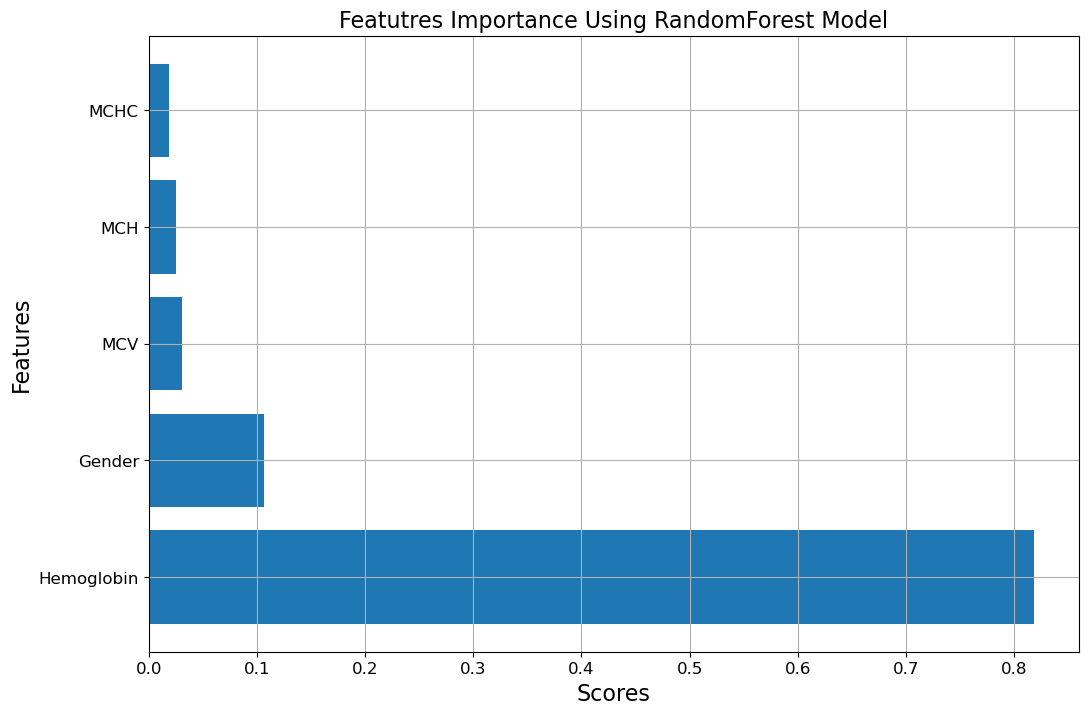

In [22]:
## plotting
plt.figure(figsize=(12, 8))
#horizontal bar
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title('Featutres Importance Using RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12) 
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

### ` XGboost`

In [23]:
## Using the Hero API -- XGBOOST
xgb_clf = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [24]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(xgb_clf, X=X_train, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(xgb_clf, X=X_train, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(xgb_clf, X=X_train, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0000
CV F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0000
Final Accuracy: 1.0000
Confusion Matrix:
[[644   0]
 [  0 492]]


### `Tuning XGBoost`

In [25]:
### Let's try tuning XGBoost using GridSearchCV  --- needs alot of tuning
params_best_xgb = {'n_estimators': np.arange(100, 200, 30), 'max_depth': np.arange(2, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.7,0.8, 0.9]}
grid_xgb = GridSearchCV(estimator=xgb_clf, param_grid=params_best_xgb, cv=5, 
                        scoring='accuracy', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train, y_train)  ## train

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=6,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 130, 160, 190]),
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=6)

In [26]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

## Get the best estimator
best_xgb = grid_xgb.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_xgb)

best_xgb_params --  {'learning_rate': 0.1, 'max_depth': np.int64(2), 'n_estimators': np.int64(100), 'subsample': 0.7}
best_xgb --  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None,
              max_depth=np.int64(2), max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(100), n_jobs=None, num_parallel_tree=None, ...)


In [27]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(best_xgb, X=X_train, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(best_xgb, X=X_train, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(best_xgb, X=X_train, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0000
CV F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0000
Final Accuracy: 1.0000
Confusion Matrix:
[[644   0]
 [  0 492]]


### `Feature Importance using XGBoost`

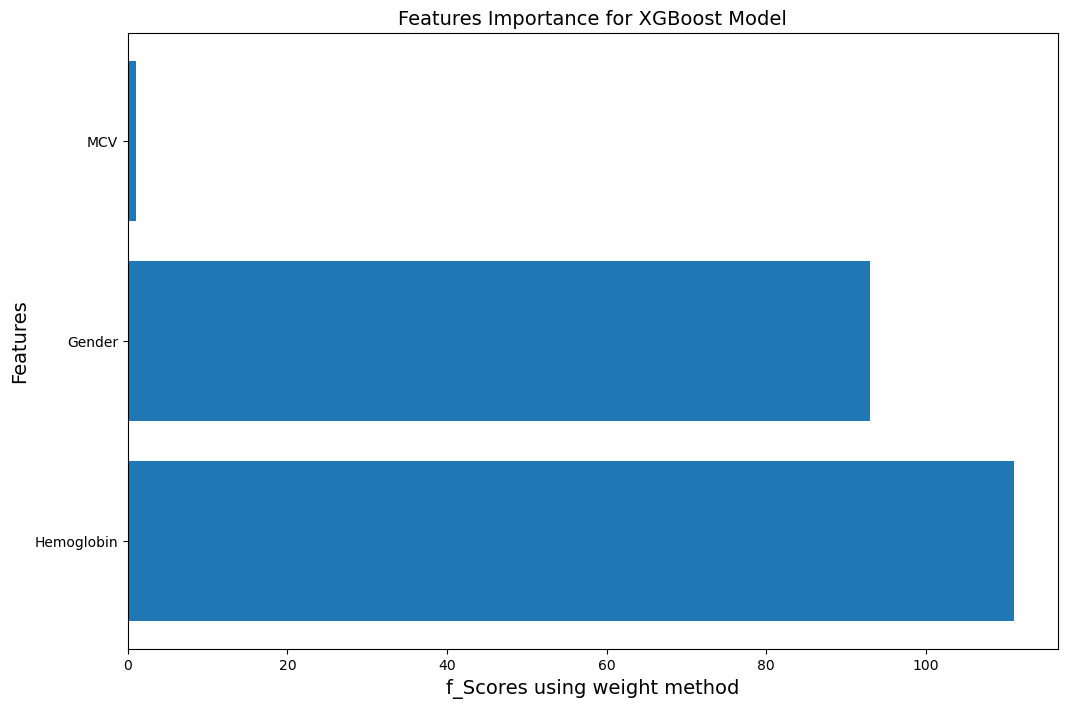

In [28]:
feat_import_xgb = best_xgb.get_booster().get_score(importance_type='weight')  ## the same as RF, but RF normalize
df_feat_import_xgb = pd.DataFrame.from_dict(feat_import_xgb, orient='index')   ## to DF
df_feat_import_xgb = df_feat_import_xgb.reset_index()
df_feat_import_xgb = df_feat_import_xgb.rename(columns={'index': 'Features', 0:'f_scores'})  ## Some Modification

df_feat_import_xgb = df_feat_import_xgb

# ## Some Sort to plot
df_feat_import_xgb = df_feat_import_xgb.sort_values(by='f_scores', ascending=False)


## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_xgb['Features'], width=df_feat_import_xgb['f_scores'])
plt.title('Features Importance for XGBoost Model', fontsize=14, c='k')
plt.xlabel('f_Scores using weight method', fontsize=14, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.ylabel('Features', fontsize=14, c='k')
plt.show()

### `LGBM`

In [29]:
lgbm_clf = LGBMClassifier( n_estimators=100,max_depth=6,learning_rate=0.1,subsample=0.8,random_state=42)

In [30]:
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 492, number of negative: 644
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 498
[LightGBM] [Info] Number of data points in the train set: 1136, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433099 -> initscore=-0.269220
[LightGBM] [Info] Start training from score -0.269220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(max_depth=6, random_state=42, subsample=0.8)

In [31]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(lgbm_clf, X=X_train, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(lgbm_clf, X=X_train, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(lgbm_clf, X=X_train, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0000
CV F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0000
Final Accuracy: 1.0000
Confusion Matrix:
[[644   0]
 [  0 492]]


### `Tuning LGBM`

In [32]:
### Let's try tuning lgbm using GridSearchCV  --- needs alot of tuning
params_best_lgbm = {'n_estimators': np.arange(100, 200, 30), 'max_depth': np.arange(2, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.7,0.8, 0.9]}
grid_lgbm = GridSearchCV(estimator=lgbm_clf, param_grid=params_best_lgbm, cv=5, 
                        scoring='accuracy', n_jobs=-1, verbose=6)
grid_lgbm.fit(X_train, y_train)  ## train

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[LightGBM] [Info] Number of positive: 492, number of negative: 644
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 498
[LightGBM] [Info] Number of data points in the train set: 1136, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433099 -> initscore=-0.269220
[LightGBM] [Info] Start training from score -0.269220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_depth=6, random_state=42,
                                      subsample=0.8),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 130, 160, 190]),
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=6)

In [33]:
## Get the best Params
best_lgbm_params = grid_lgbm.best_params_
print('best_lgbm_params -- ', best_lgbm_params)

## Get the best estimator
best_lgbm = grid_lgbm.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_lgbm)

best_lgbm_params --  {'learning_rate': 0.1, 'max_depth': np.int64(2), 'n_estimators': np.int64(100), 'subsample': 0.7}
best_xgb --  LGBMClassifier(max_depth=np.int64(2), n_estimators=np.int64(100),
               random_state=42, subsample=0.7)


In [34]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(best_lgbm, X=X_train, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(best_lgbm, X=X_train, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(best_lgbm, X=X_train, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0000
CV F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0000
Final Accuracy: 1.0000
Confusion Matrix:
[[644   0]
 [  0 492]]


### `Feature Importance using LGBM`

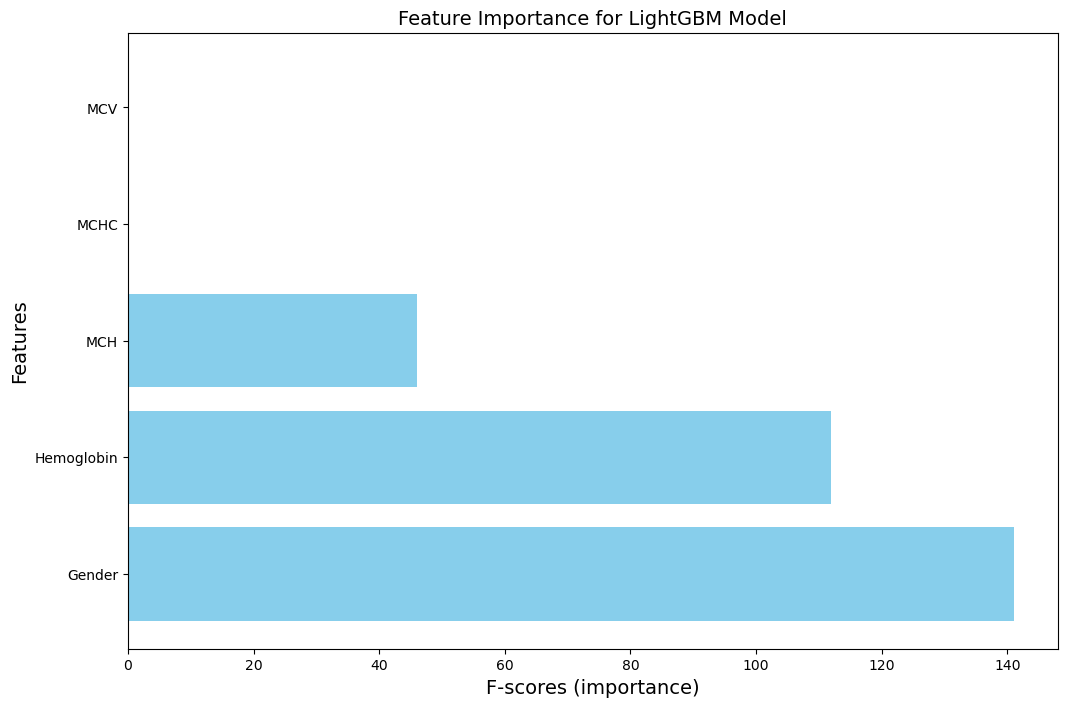

In [35]:
# 1. Get feature importance from LightGBM
feat_import_lgbm = best_lgbm.feature_importances_  # Use .feature_importances_ for LightGBM
feature_names = best_lgbm.feature_name_  # Or your original feature names if not available

# 2. Create DataFrame
df_feat_import_lgbm = pd.DataFrame({
    'Features': feature_names,
    'f_scores': feat_import_lgbm
})

# 3. Sort by importance
df_feat_import_lgbm = df_feat_import_lgbm.sort_values(by='f_scores', ascending=False)

# 4. Plot (use plt.barh for horizontal bars)
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_lgbm['Features'], width=df_feat_import_lgbm['f_scores'], color='skyblue')
plt.title('Feature Importance for LightGBM Model', fontsize=14, color='k')
plt.xlabel('F-scores (importance)', fontsize=14, color='k')
plt.ylabel('Features', fontsize=14, color='k')
plt.show()

### `Download the best Model --- best_xgb`

In [36]:
joblib.dump(best_forest, 'anemia_model.sav.pkl')

['anemia_model.sav.pkl']

In [37]:
loaded_model = joblib.load('anemia_model.sav.pkl')
loaded_model

RandomForestClassifier(max_depth=np.int64(10), max_samples=np.float64(0.8),
                       n_estimators=np.int64(200), n_jobs=-1, random_state=42)

### `Inference on Test Dataset`

In [39]:
y_pred_test = loaded_model.predict(X_test) 

## accuraccy on test after finishing all my work
accuracy_test = np.sqrt(accuracy_score(y_test, y_pred_test)) 
print(f'accuracy on test Dataset using Random Forest -- {accuracy_test:.3f}') 

accuracy on test Dataset using Random Forest -- 1.000
